

```
# Import Dataset
```



In [ ]:
pip install torch torchvision datasets transformers

In [ ]:
import os
import urllib.request
import zipfile

# Create directories
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/raw_unzipped", exist_ok=True)

# Dataset URLs
urls = [
    "http://images.cocodataset.org/zips/train2014.zip",
    "http://images.cocodataset.org/zips/val2014.zip",
    "http://images.cocodataset.org/zips/test2014.zip",
    "http://images.cocodataset.org/annotations/annotations_trainval2014.zip"
]

# Download files
for url in urls:
    filename = os.path.join("data/raw", os.path.basename(url))
    print(f"Downloading {url} -> {filename}")
    urllib.request.urlretrieve(url, filename)
    print(f"Saved {filename}")

    # Unzip each file
    print(f"Unzipping {filename} ...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("data/raw_unzipped")
    print(f"Extracted to data/raw_unzipped")

print("All downloads and extractions complete.")


Saved data/raw/train2014.zip
Unzipping data/raw/train2014.zip ...
Extracted to data/raw_unzipped
Saved data/raw/val2014.zip
Unzipping data/raw/val2014.zip ...
Extracted to data/raw_unzipped
Saved data/raw/test2014.zip
Unzipping data/raw/test2014.zip ...
Extracted to data/raw_unzipped
Saved data/raw/annotations_trainval2014.zip
Unzipping data/raw/annotations_trainval2014.zip ...
Extracted to data/raw_unzipped
All downloads and extractions complete.


{http://images.cocodataset.org/zips/train2014.zip}

{http://images.cocodataset.org/zips/val2014.zip}

{http://images.cocodataset.org/zips/test2014.zip}

In [ ]:
from pycocotools.coco import COCO
import json
import os
from tqdm import tqdm

# Paths
src_ann = "/content/data/raw_unzipped/annotations/instances_train2014.json"
dst_ann = "/content/data/raw_unzipped/annotations/instances_train2014_filtered.json"
target_classes = ["person", "bicycle", "car", "motorcycle", "bus", "truck"]

# Load original annotations
coco = COCO(src_ann)

# Map category names to IDs
target_cat_ids = coco.getCatIds(catNms=target_classes)

# Get all annotations for those categories
target_ann_ids = coco.getAnnIds(catIds=target_cat_ids)
target_anns = coco.loadAnns(target_ann_ids)

# Get unique image IDs
target_img_ids = list({ann["image_id"] for ann in target_anns})

# Filter dataset
filtered = {
    "info": coco.dataset["info"],
    "licenses": coco.dataset["licenses"],
    "images": [img for img in coco.dataset["images"] if img["id"] in target_img_ids],
    "annotations": [ann for ann in coco.dataset["annotations"] if ann["category_id"] in target_cat_ids],
    "categories": [cat for cat in coco.dataset["categories"] if cat["id"] in target_cat_ids]
}

# Reindex category IDs to continuous 0-based values
old_to_new = {old_id: i for i, old_id in enumerate(target_cat_ids)}

# Update annotations
for ann in filtered["annotations"]:
    ann["category_id"] = old_to_new[ann["category_id"]]

# Update categories
for cat in filtered["categories"]:
    cat["id"] = old_to_new[cat["id"]]

# Save filtered annotations
with open(dst_ann, "w") as f:
    json.dump(filtered, f)

print(f"Filtered dataset saved to {dst_ann}")
print(f"Images: {len(filtered['images'])}, Annotations: {len(filtered['annotations'])}")


loading annotations into memory...
Done (t=10.08s)
creating index...
index created!
Filtered dataset saved to /content/data/raw_unzipped/annotations/instances_train2014_filtered.json
Images: 49252, Annotations: 238454


In [ ]:
from pycocotools.coco import COCO
import json
import os
from tqdm import tqdm

# Paths
src_ann = "/content/data/raw_unzipped/annotations/instances_val2014.json"
dst_ann = "/content/data/raw_unzipped/annotations/instances_val2014_filtered.json"
target_classes = ["person", "bicycle", "car", "motorcycle", "bus", "truck"]

# Load original annotations
coco = COCO(src_ann)

# Map category names to IDs
target_cat_ids = coco.getCatIds(catNms=target_classes)

# Get all annotations for those categories
target_ann_ids = coco.getAnnIds(catIds=target_cat_ids)
target_anns = coco.loadAnns(target_ann_ids)

# Get unique image IDs
target_img_ids = list({ann["image_id"] for ann in target_anns})

# Filter dataset
filtered = {
    "info": coco.dataset["info"],
    "licenses": coco.dataset["licenses"],
    "images": [img for img in coco.dataset["images"] if img["id"] in target_img_ids],
    "annotations": [ann for ann in coco.dataset["annotations"] if ann["category_id"] in target_cat_ids],
    "categories": [cat for cat in coco.dataset["categories"] if cat["id"] in target_cat_ids]
}
# Reindex category IDs to continuous 0-based values
old_to_new = {old_id: i for i, old_id in enumerate(target_cat_ids)}

# Update annotations
for ann in filtered["annotations"]:
    ann["category_id"] = old_to_new[ann["category_id"]]

# Update categories
for cat in filtered["categories"]:
    cat["id"] = old_to_new[cat["id"]]

# Save filtered annotations
with open(dst_ann, "w") as f:
    json.dump(filtered, f)

print(f"Filtered dataset saved to {dst_ann}")
print(f"Images: {len(filtered['images'])}, Annotations: {len(filtered['annotations'])}")


loading annotations into memory...
Done (t=4.98s)
creating index...
index created!
Filtered dataset saved to /content/data/raw_unzipped/annotations/instances_val2014_filtered.json
Images: 23798, Annotations: 114081


In [ ]:
from torchvision.datasets import CocoDetection
from torchvision import transforms

# Paths
img_dir = "/content/data/raw_unzipped/train2014"
ann_file = "/content/data/raw_unzipped/annotations/instances_train2014_filtered.json"

# Dataset
transform = transforms.ToTensor()
train_dataset = CocoDetection(root=img_dir, annFile=ann_file, transform=transform)

# Inspect one sample
img, target = train_dataset[0]
print("Image shape:", img.shape)
print("Number of objects:", len(target))
print("Example annotation:", target[0])


loading annotations into memory...
Done (t=4.66s)
creating index...
index created!
Image shape: torch.Size([3, 640, 481])
Number of objects: 1
Example annotation: {'segmentation': [[345.28, 220.68, 348.17, 269.8, 355.4, 307.36, 377.07, 318.92, 395.85, 370.93, 444.97, 565.96, 473.86, 616.52, 478.19, 628.08, 431.96, 628.08, 401.63, 581.85, 377.07, 477.83, 375.62, 529.84, 387.18, 600.63, 397.29, 628.08, 325.06, 623.75, 216.7, 622.3, 216.7, 606.41, 251.38, 529.84, 223.93, 529.84, 209.48, 528.4, 202.26, 505.28, 193.59, 485.06, 167.58, 375.26, 179.14, 334.81, 203.7, 324.7, 229.71, 313.14, 209.48, 278.47, 193.59, 248.13, 208.04, 188.89, 223.93, 175.89, 236.93, 168.67, 258.6, 162.89, 294.72, 168.67, 310.61, 174.45, 326.5, 197.56]], 'area': 86145.2971, 'iscrowd': 0, 'image_id': 36, 'bbox': [167.58, 162.89, 310.61, 465.19], 'category_id': 0, 'id': 453991}


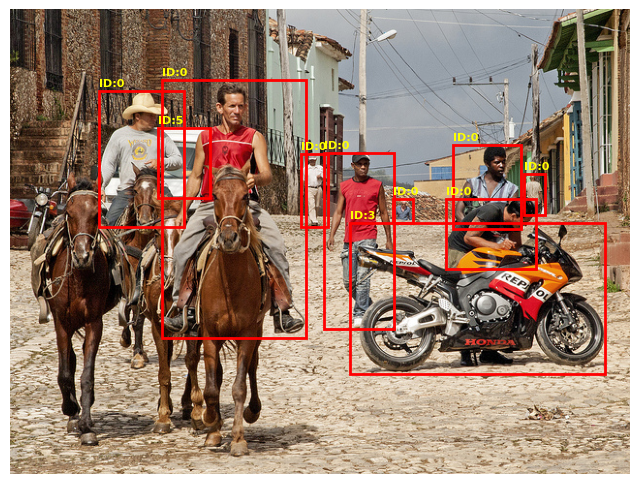

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load image and annotations
img, target = train_dataset[48000]
#img_tensor = transforms.ToTensor()(img)
# Convert tensor to PIL for plotting
img_pil = transforms.ToPILImage()(img)

# Draw
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(img_pil)

for obj in target:
    bbox = obj["bbox"]  # [x, y, width, height]
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    cat_id = obj["category_id"]
    ax.text(x, y - 5, f"ID:{cat_id}", color='yellow', fontsize=8, weight='bold')

plt.axis("off")
plt.show()


In [ ]:
import json
import pandas as pd

# Path to your filtered annotation file
ann_path = "/content/data/raw_unzipped/annotations/instances_train2014_filtered.json"

# Load JSON
with open(ann_path, "r") as f:
    data = json.load(f)

# Extract annotations and categories
anns = data["annotations"]
cats = {cat["id"]: cat["name"] for cat in data["categories"]}

# Count category occurrences
df = pd.DataFrame(anns)
label_counts = df["category_id"].value_counts().rename_axis("category_id").reset_index(name="count")
label_counts["category_name"] = label_counts["category_id"].map(cats)

print(label_counts[["category_name", "count"]])


  category_name   count
0        person  185316
1           car   30785
2         truck    7050
3    motorcycle    6021
4       bicycle    4955
5           bus    4327


In [ ]:
with open(ann_path, "r") as f:
    data = json.load(f)

# Extract id-name pairs
cat_map = [(cat["id"], cat["name"]) for cat in data["categories"]]

# Display as DataFrame
df = pd.DataFrame(cat_map, columns=["category_id", "category_name"])
print(df)

   category_id category_name
0            0        person
1            1       bicycle
2            2           car
3            3    motorcycle
4            4           bus
5            5         truck


In [ ]:
len(train_dataset)

49252

In [ ]:
import json

# Input and output paths
src_ann = "/content/data/raw_unzipped/annotations/instances_train2014_filtered.json"
dst_ann = "/content/data/raw_unzipped/annotations/instances_train2014_minimal.json"

# Load file
with open(src_ann, "r") as f:
    data = json.load(f)

# Keep only required keys
cleaned = {
    "images": data["images"],
    "annotations": [
        {k: ann[k] for k in ["bbox", "category_id", "image_id", "id"]}
        for ann in data["annotations"]
    ],
    "categories": data["categories"]
}

# Save cleaned version
with open(dst_ann, "w") as f:
    json.dump(cleaned, f)

print(f"Saved cleaned annotation file: {dst_ann}")
print(f"Images: {len(cleaned['images'])}, Annotations: {len(cleaned['annotations'])}")


Saved cleaned annotation file: /content/data/raw_unzipped/annotations/instances_train2014_minimal.json
Images: 49252, Annotations: 238454


In [ ]:
import json

# Input and output paths
src_ann = "/content/data/raw_unzipped/annotations/instances_val2014_filtered.json"
dst_ann = "/content/data/raw_unzipped/annotations/instances_val2014_minimal.json"

# Load file
with open(src_ann, "r") as f:
    data = json.load(f)

# Keep only required keys
cleaned = {
    "images": data["images"],
    "annotations": [
        {k: ann[k] for k in ["bbox", "category_id", "image_id", "id"]}
        for ann in data["annotations"]
    ],
    "categories": data["categories"]
}

# Save cleaned version
with open(dst_ann, "w") as f:
    json.dump(cleaned, f)

print(f"Saved cleaned annotation file: {dst_ann}")
print(f"Images: {len(cleaned['images'])}, Annotations: {len(cleaned['annotations'])}")


Saved cleaned annotation file: /content/data/raw_unzipped/annotations/instances_val2014_minimal.json
Images: 23798, Annotations: 114081


In [ ]:
import os
import json
from tqdm import tqdm
import shutil

# Source paths
src_img_dir = "/content/data/raw_unzipped/train2014"
src_ann = "/content/data/raw_unzipped/annotations/instances_train2014_minimal.json"

# Destination structure
base_dir = "/content/data/train"
img_dir = os.path.join(base_dir, "images")
lbl_dir = os.path.join(base_dir, "labels")
os.makedirs(img_dir, exist_ok=True)
os.makedirs(lbl_dir, exist_ok=True)

# Load minimal annotations
with open(src_ann, "r") as f:
    data = json.load(f)

# Build map from image_id → filename
id_to_file = {img["id"]: img["file_name"] for img in data["images"]}

# For each image, gather all its boxes
img_to_boxes = {}
for ann in data["annotations"]:
    img_id = ann["image_id"]
    bbox = ann["bbox"]  # COCO: [x, y, w, h]
    cat_id = ann["category_id"]

    if img_id not in img_to_boxes:
        img_to_boxes[img_id] = []
    img_to_boxes[img_id].append((bbox, cat_id))

# Convert COCO bbox → YOLO format
def coco_to_yolo(x, y, w, h, img_w, img_h):
    xc = (x + w / 2) / img_w
    yc = (y + h / 2) / img_h
    w /= img_w
    h /= img_h
    return xc, yc, w, h

# Write label files
for img_id, boxes in tqdm(img_to_boxes.items(), desc="Processing"):
    img_file = id_to_file[img_id]
    src_path = os.path.join(src_img_dir, img_file)
    dst_img_path = os.path.join(img_dir, img_file)
    shutil.copy(src_path, dst_img_path)

    # Get image size from annotation
    img_info = next(img for img in data["images"] if img["id"] == img_id)
    img_w, img_h = img_info["width"], img_info["height"]

    # Write .txt label
    txt_name = os.path.splitext(img_file)[0] + ".txt"
    lbl_path = os.path.join(lbl_dir, txt_name)
    with open(lbl_path, "w") as f:
        for (bbox, cat_id) in boxes:
            x, y, w, h = bbox
            xc, yc, w, h = coco_to_yolo(x, y, w, h, img_w, img_h)
            f.write(f"{cat_id} {xc:.6f} {yc:.6f} {w:.6f} {h:.6f}\n")

print("Dataset restructured:")
print(f"Images in {img_dir}")
print(f"Labels in {lbl_dir}")


Processing: 100%|██████████| 49252/49252 [05:07<00:00, 160.04it/s]

Dataset restructured:
Images in /content/data/train/images
Labels in /content/data/train/labels


In [ ]:
import os
import json
from tqdm import tqdm
import shutil

# Source paths
src_img_dir = "/content/data/raw_unzipped/val2014"
src_ann = "/content/data/raw_unzipped/annotations/instances_val2014_minimal.json"

# Destination structure
base_dir = "/content/data/val"
img_dir = os.path.join(base_dir, "images")
lbl_dir = os.path.join(base_dir, "labels")
os.makedirs(img_dir, exist_ok=True)
os.makedirs(lbl_dir, exist_ok=True)

# Load minimal annotations
with open(src_ann, "r") as f:
    data = json.load(f)

# Build map from image_id → filename
id_to_file = {img["id"]: img["file_name"] for img in data["images"]}

# For each image, gather all its boxes
img_to_boxes = {}
for ann in data["annotations"]:
    img_id = ann["image_id"]
    bbox = ann["bbox"]  # COCO: [x, y, w, h]
    cat_id = ann["category_id"]

    if img_id not in img_to_boxes:
        img_to_boxes[img_id] = []
    img_to_boxes[img_id].append((bbox, cat_id))

# Convert COCO bbox → YOLO format
def coco_to_yolo(x, y, w, h, img_w, img_h):
    xc = (x + w / 2) / img_w
    yc = (y + h / 2) / img_h
    w /= img_w
    h /= img_h
    return xc, yc, w, h

# Write label files
for img_id, boxes in tqdm(img_to_boxes.items(), desc="Processing"):
    img_file = id_to_file[img_id]
    src_path = os.path.join(src_img_dir, img_file)
    dst_img_path = os.path.join(img_dir, img_file)
    shutil.copy(src_path, dst_img_path)

    # Get image size from annotation
    img_info = next(img for img in data["images"] if img["id"] == img_id)
    img_w, img_h = img_info["width"], img_info["height"]

    # Write .txt label
    txt_name = os.path.splitext(img_file)[0] + ".txt"
    lbl_path = os.path.join(lbl_dir, txt_name)
    with open(lbl_path, "w") as f:
        for (bbox, cat_id) in boxes:
            x, y, w, h = bbox
            xc, yc, w, h = coco_to_yolo(x, y, w, h, img_w, img_h)
            f.write(f"{cat_id} {xc:.6f} {yc:.6f} {w:.6f} {h:.6f}\n")

print("Dataset restructured:")
print(f"Images in {img_dir}")
print(f"Labels in {lbl_dir}")


Processing: 100%|██████████| 23798/23798 [01:44<00:00, 226.74it/s]

Dataset restructured:
Images in /content/data/val/images
Labels in /content/data/val/labels


In [ ]:
!tree -d

/bin/bash: line 1: tree: command not found


In [3]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (428 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [4]:
!tree -d /content/data

/content/data
├── raw
└── raw_unzipped
    └── DATS_2022
        ├── Images and XML files
        │   └── XML images
        └── Images with Annotations
            ├── Images
            ├── JSON files
            ├── TXT files
            └── XML files

10 directories


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.7 MB/s eta 0:00:00


In [ ]:
# Define the content for the YAML file as a multi-line string
yaml_content = """
# Train/val datasets
train: /content/data/train/images
val: /content/data/val/images

# Number of classes
nc: 6

# Class names
names: ["person", "bicycle", "car", "motorcycle", "bus", "truck"]
"""

# Define the name of the file to be created
file_name = "/content/data/coco6.yaml"

# Open the file in write mode ('w') and write the content to it
# The 'with' statement ensures the file is properly closed after writing
try:
    with open(file_name, 'w') as f:
        # The strip() method removes any leading/trailing whitespace from the string
        f.write(yaml_content.strip())
    print(f"✅ Successfully created '{file_name}'")
except Exception as e:
    print(f"❌ An error occurred: {e}")


✅ Successfully created '/content/data/coco6.yaml'


In [ ]:
!yolo detect train model=yolov8n.pt data=/content/data/coco6.yaml epochs=20 imgsz=256 batch=16

Streaming output truncated to the last 5000 lines.
train: /content/data/train/images/COCO_train2014_000000404385.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000404424.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000404828.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000404877.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000405131.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000405145.jpg: ignoring corrupt image

In [ ]:
!yolo detect train model=yolov8n.pt data=/content/data/coco6.yaml epochs=20 imgsz=256 batch=-1 device=0 workers=8 cache='gpu'


Streaming output truncated to the last 5000 lines.
train: /content/data/train/images/COCO_train2014_000000403464.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000403489.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000403534.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000403542.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000403590.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/data/train/images/COCO_train2014_000000403773.jpg: ignoring corrupt image

KeyboardInterrupt: 

In [ ]:
!yolo detect train model=yolov8n.pt data=/content/data/coco6.yaml epochs=20 imgsz=640 batch=-1 device=0 workers=8 cache='gpu'

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=gpu, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/coco6.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

In [ ]:
!yolo detect train model=yolov8n.pt data=/content/data/coco6.yaml epochs=20 imgsz=480 batch=-1 device=cpu workers=8

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/coco6.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

In [ ]:
!yolo detect train model=yolo11t.pt data=/content/data/coco6.yaml device=cpu imgsz=320 epochs=10

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 960, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/models/yolo/model.py", line 83, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 153, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 297, in _load
    self.model, self.ckpt = load_checkpoint(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py", line 1517, in load_checkpoint
    ckpt, weight = torch_safe_load(weight)  # load ckpt
                   ^^^^^^^^^

In [ ]:
!yolo detect train model=yolo11n.pt data=/content/data/coco6.yaml device=cpu imgsz=320 epochs=10

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/coco6.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

In [ ]:
!yolo help models


    Arguments received: ['yolo', 'help', 'models']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['pose', 'classify', 'detect', 'segment', 'obb']
                MODE (required) is one of ['track', 'benchmark', 'train', 'val', 'export', 'predict']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo11n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolo11n.pt data=coco8.yaml

In [ ]:
import shutil
import os

base_dir = "/content/data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

train_zip = os.path.join(base_dir, "train.zip")
val_zip = os.path.join(base_dir, "val.zip")

# Create ZIP archives
shutil.make_archive(train_zip.replace(".zip", ""), 'zip', train_dir)
shutil.make_archive(val_zip.replace(".zip", ""), 'zip', val_dir)

print(f"Created: {train_zip}")
print(f"Created: {val_zip}")


In [1]:
import os
import urllib.request
import zipfile

# Create directories
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/raw_unzipped", exist_ok=True)

# Dataset URLs
urls = [
    'https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/nfc34n8svj-2.zip'
]

# Download files
for url in urls:
    filename = os.path.join("data/raw", os.path.basename(url))
    print(f"Downloading {url} -> {filename}")
    urllib.request.urlretrieve(url, filename)
    print(f"Saved {filename}")

    # Unzip each file
    print(f"Unzipping {filename} ...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("data/raw_unzipped")
    print(f"Extracted to data/raw_unzipped")

print("All downloads and extractions complete.")

Saved data/raw/nfc34n8svj-2.zip
Unzipping data/raw/nfc34n8svj-2.zip ...
Extracted to data/raw_unzipped
All downloads and extractions complete.


In [5]:
! find /content/data/raw_unzipped/DATS_2022/Images\ with\ Annotations/Images -type f | wc -l

2048


In [6]:
import pandas as pd
import glob
import os

# 1. Define the path to your JSON files
json_dir = '/content/data/raw_unzipped/DATS_2022/Images with Annotations/JSON files'

# 2. Find all JSON files in the directory
all_json_files = glob.glob(os.path.join(json_dir, '*.json'))

# A list to store the data from all JSON files
all_data = []

# Loop through each JSON file and read it
for file_path in all_json_files:
    # Use 'lines=True' if each line is a separate JSON object (common for logs)
    # If it's a single JSON object (e.g., a list of records), you might need 'orient="records"' or a different approach
    try:
        df = pd.read_json(file_path, lines=True)
        all_data.append(df)
    except ValueError as e:
        print(f"Error reading {file_path}. Trying a different method.")
        # Fallback for a single JSON object that is a list of records
        try:
            df = pd.read_json(file_path)
            all_data.append(df)
        except Exception as e_nested:
            print(f"Failed to read {file_path} with both methods. Error: {e_nested}")


if all_data:
    # 3. Combine all data into a single DataFrame
    combined_df = pd.concat(all_data, ignore_index=True)

    # 4. Assume your class name is in a column named 'label' (or use your actual column name)
    class_column = 'label'  # <--- **CHANGE THIS IF YOUR COLUMN IS NAMED DIFFERENTLY (e.g., 'category')**

    if class_column in combined_df.columns:
        # 5. Get the count and names of unique classes
        class_counts = combined_df[class_column].value_counts()

        # Total number of unique classes
        num_classes = class_counts.nunique() # Or simply len(class_counts)

        print("-" * 30)
        print(f"Total Number of Unique Classes Found: {num_classes}")
        print("-" * 30)
        print("Class Names and their Total Count:")
        print(class_counts)
        print("-" * 30)
        print("\nList of Unique Class Names:")
        # The unique class names are the index of the value_counts result
        print(class_counts.index.tolist())
    else:
        print(f"Error: The column '{class_column}' was not found in the JSON data.")
else:
    print("No data was successfully loaded from the JSON files.")

Error: The column 'label' was not found in the JSON data.


In [11]:
import pandas as pd
import json
import glob
import os

# !!! IMPORTANT: REPLACE THIS WITH THE CORRECT PATH TO YOUR JSON FILES !!!
json_dir = '/content/data/consolidated_json'

all_json_files = glob.glob(os.path.join(json_dir, '*.json'))
all_annotations_data = []

for file_path in all_json_files:
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)

        # This command is crucial for handling your nested structure:
        # It drills into the 'annotations' list and extracts the 'label'
        df_annotations = pd.json_normalize(
            data,
            record_path=['annotations'],
            meta=['image']
        )
        all_annotations_data.append(df_annotations)
    except Exception as e:
        print(f"Failed to process {file_path}. Error: {e}")

if all_annotations_data:
    combined_annotations_df = pd.concat(all_annotations_data, ignore_index=True)
    class_counts = combined_annotations_df['label'].value_counts()

    num_classes = len(class_counts)

    print(f"Total Number of Unique Classes Found: {num_classes}")
    print("Class Names and their Total Annotation Counts:")
    print(class_counts.to_string())

Total Number of Unique Classes Found: 6
Class Names and their Total Annotation Counts:
label
Other        3955
motorbike    3537
car          2377
person       1715
bus           231
bicycle        65


In [10]:
import pandas as pd
import json
import glob
import os

# --- 1. Define Paths and Consolidation Map ---

# Assuming this path structure is now accessible within the environment
base_dir = '/content/data'
# Recursive search for all JSON files inside any 'JSON files' folder
original_json_folder = os.path.join(base_dir, '**', 'JSON files')
all_json_files = glob.glob(os.path.join(original_json_folder, '*.json'), recursive=True)

# Define the output directory path
output_dir = os.path.join(base_dir, 'consolidated_json')

# Define the consolidation map: {Original Label: New Target Label}
# Any label NOT included here will be automatically mapped to 'Other'.
CONSOLIDATION_MAP = {
    # Target 1: person (including variations/roles)
    'person': 'person',
    'Person': 'person',
    'Traffic Police': 'person',
    'Traffic POlice': 'person',

    # Target 2: motorbike (assuming Bike and Rikshaw are motorized)
    'Bike': 'motorbike',
    'Rikshaw': 'motorbike',

    # Target 3: car (including utility vehicles)
    'Car': 'car',
    'Ambulance': 'car',

    # Target 4: bus
    'Bus': 'bus',

    # Target 5: bicycle
    'Cycle': 'bicycle',

    # --- Remaining 40 labels mapped explicitly to 'Other' ---
    'Truck': 'Other', 'Tempo': 'Other', 'Lamp Post': 'Other', 'Lamo Post': 'Other',
    'Traffic Signal': 'Other', 'Tree': 'Other', 'Electricity Pole': 'Other', 'Board': 'Other',
    'Traffic Sign Board': 'Other', 'Road Divider': 'Other', 'Vegetation': 'Other',
    'Zebra Crossing': 'Other', 'Bridge': 'Other', 'Petrol Pump': 'Other', 'Building': 'Other',
    'Tyre Works': 'Other', 'Crane': 'Other', 'Barricade': 'Other', 'Wall': 'Other',
    'Footpath': 'Other', 'Overbridge': 'Other', 'Digital Display': 'Other', 'Manhole': 'Other',
    'Gate': 'Other', 'Sign Board': 'Other',
    'WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW': 'Other',
    'Cattle': 'Other', 'Dog': 'Other', 'Camel': 'Other', 'Goat': 'Other', 'Cart': 'Other',
    'Tractor': 'Other', 'Horse': 'Other', 'Bus stop': 'Other', 'Bus Stop': 'Other'
}

# --- 2. Create Output Directory ---

try:
    os.makedirs(output_dir, exist_ok=True)
    print(f"Created output directory: {output_dir}")
except Exception as e:
    print(f"Error creating output directory: {e}")
    # Exit if cannot proceed
    exit()

# --- 3. Process, Remap, and Save Files ---

if not all_json_files:
    print("\nError: No JSON files found. Check the original directory path.")
else:
    print(f"\nFound {len(all_json_files)} JSON files. Starting consolidation and saving...")

    # List to track all annotations for final summary count
    all_consolidated_labels = []
    processed_count = 0

    for file_path in all_json_files:
        try:
            # 3a. Load JSON data
            with open(file_path, 'r') as f:
                data = json.load(f)

            # 3b. Apply Consolidation to each annotation
            for record in data:
                if 'annotations' in record:
                    for annotation in record['annotations']:
                        original_label = annotation.get('label')

                        # Get the new label from the map, defaulting to 'Other' if not found
                        new_label = CONSOLIDATION_MAP.get(original_label, 'Other')

                        # Update the label in the JSON structure
                        annotation['label'] = new_label

                        # Store the new label for the final summary count
                        all_consolidated_labels.append(new_label)

            # 3c. Save the Modified JSON to the new folder
            file_name = os.path.basename(file_path)
            output_file_path = os.path.join(output_dir, file_name)

            with open(output_file_path, 'w') as f:
                json.dump(data, f, indent=4)

            processed_count += 1

        except Exception as e:
            print(f"Skipping {file_path}. Error during processing/saving: {e}")

    # --- 4. Final Summary Count (Optional, but useful) ---

    if all_consolidated_labels:
        final_counts = pd.Series(all_consolidated_labels).value_counts()
        num_classes = len(final_counts)

        print("\n" + "=" * 60)
        print(f"SUCCESS! Consolidated {processed_count} files into '{output_dir}'.")
        print(f"New Total Number of Unique Classes: {num_classes}")
        print("=" * 60)
        print("CONSOLIDATED CLASS NAMES AND TOTAL ANNOTATION COUNTS:")
        print(final_counts.to_string())
        print("=" * 60)
    else:
        print("\nProcessed files, but no annotations were found to count.")


Created output directory: /content/data/consolidated_json

Found 2226 JSON files. Starting consolidation and saving...

SUCCESS! Consolidated 2226 files into '/content/data/consolidated_json'.
New Total Number of Unique Classes: 6
CONSOLIDATED CLASS NAMES AND TOTAL ANNOTATION COUNTS:
Other        3955
motorbike    3537
car          2377
person       1715
bus           231
bicycle        65


In [ ]:
import os
import json
import shutil
from tqdm import tqdm
from torch.utils.data import random_split
from torchvision.datasets import CocoDetection
from torchvision import transforms

# ==== Paths ====
img_dir = "/content/data/raw_unzipped/DATS_2022/Images with Annotations/Images"
ann_file = "/content/data/raw_unzipped/annotations/instances_val2017_minimal.json"

# ==== Load full dataset ====
transform = transforms.ToTensor()
full_dataset = CocoDetection(root=img_dir, annFile=ann_file, transform=transform)

# ==== Split ====
train_ratio = 0.8
total_size = len(full_dataset)
train_size = int(train_ratio * total_size)
test_size = total_size - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# ==== Output folders ====
for split_name, dataset in zip(["train", "test"], [train_dataset, test_dataset]):
    base_dir = f"/content/data/{split_name}"
    img_out = os.path.join(base_dir, "images")
    lbl_out = os.path.join(base_dir, "labels")
    os.makedirs(img_out, exist_ok=True)
    os.makedirs(lbl_out, exist_ok=True)

    print(f"\nSaving {split_name} dataset:")

    # Load original annotation JSON
    with open(ann_file, "r") as f:
        data = json.load(f)
    id_to_file = {img["id"]: img["file_name"] for img in data["images"]}
    id_to_size = {img["id"]: (img["width"], img["height"]) for img in data["images"]}

    # Build image_id → boxes map
    img_to_boxes = {}
    for ann in data["annotations"]:
        img_id = ann["image_id"]
        bbox = ann["bbox"]
        cat_id = ann["category_id"]
        img_to_boxes.setdefault(img_id, []).append((bbox, cat_id))

    # ==== Helper ====
    def coco_to_yolo(x, y, w, h, img_w, img_h):
        xc = (x + w / 2) / img_w
        yc = (y + h / 2) / img_h
        return xc, yc, w / img_w, h / img_h

    # ==== Save each item ====
    for i in tqdm(range(len(dataset)), desc=f"Processing {split_name}"):
        img, target = dataset[i]
        img_info = target[0]["image_id"]
        filename = id_to_file[img_info]

        # Copy image
        src_path = os.path.join(img_dir, filename)
        dst_img = os.path.join(img_out, filename)
        shutil.copy(src_path, dst_img)

        # Write label file
        img_w, img_h = id_to_size[img_info]
        boxes = img_to_boxes.get(img_info, [])
        txt_path = os.path.join(lbl_out, os.path.splitext(filename)[0] + ".txt")

        with open(txt_path, "w") as f:
            for (bbox, cat_id) in boxes:
                x, y, w, h = bbox
                xc, yc, w, h = coco_to_yolo(x, y, w, h, img_w, img_h)
                f.write(f"{cat_id} {xc:.6f} {yc:.6f} {w:.6f} {h:.6f}\n")

print("\n✅ Train/Test datasets saved to /content/data/train and /content/data/test")


In [ ]:
from torch.utils.data import random_split
from torchvision.datasets import CocoDetection
from torchvision import transforms

# Paths
img_dir = "/content/data/raw_unzipped/DATS_2022/Images with Annotations/Images"
ann_folder  = "/content/data/consolidated_json"

# Full dataset
transform = transforms.ToTensor()
full_dataset = CocoDetection(root=img_dir, annFile=ann_file, transform=transform)

# Split ratios
train_ratio = 0.8
test_ratio = 0.2
total_size = len(full_dataset)
train_size = int(train_ratio * total_size)
test_size = total_size - train_size

# Split
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Example inspection
img, target = train_dataset[0]
print("Train sample — Image shape:", img.shape)
print("Number of objects:", len(target))
print("Example annotation:", target[0])


In [12]:
import os
import json
from PIL import Image

img_dir = "/content/data/raw_unzipped/DATS_2022/Images with Annotations/Images"
ann_folder = "/content/data/consolidated_json"
output_dir = "/content/data/yolo_labels"

os.makedirs(output_dir, exist_ok=True)

# Define your label map
label_map = {
    "person": 0,
    "car": 1,
    "bus":2,
    "motorbike": 3,
    "bicycle":4,
    "Other": 5,
}

for ann_file in os.listdir(ann_folder):
    if not ann_file.endswith(".json"):
        continue

    with open(os.path.join(ann_folder, ann_file), "r") as f:
        data = json.load(f)

    for item in data:
        img_name = item["image"]
        img_path = os.path.join(img_dir, img_name)
        if not os.path.exists(img_path):
            continue

        img = Image.open(img_path)
        w, h = img.size

        yolo_lines = []
        for ann in item["annotations"]:
            label = ann["label"]
            if label not in label_map:
                continue

            x = ann["coordinates"]["x"]
            y = ann["coordinates"]["y"]
            width = ann["coordinates"]["width"]
            height = ann["coordinates"]["height"]

            # Normalize to YOLO format
            x_center = x / w
            y_center = y / h
            norm_w = width / w
            norm_h = height / h

            class_id = label_map[label]
            yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {norm_w:.6f} {norm_h:.6f}")

        txt_path = os.path.join(output_dir, os.path.splitext(img_name)[0] + ".txt")
        with open(txt_path, "w") as out_f:
            out_f.write("\n".join(yolo_lines))


In [13]:
import os
import shutil
import random

# Paths
base_dir = "/content/data"
images_dir = os.path.join(base_dir, "raw_unzipped/DATS_2022/Images with Annotations/Images")
labels_dir = os.path.join(base_dir, "yolo_labels")

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Create YOLO folder structure
for split in [train_dir, test_dir]:
    os.makedirs(os.path.join(split, "images"), exist_ok=True)
    os.makedirs(os.path.join(split, "labels"), exist_ok=True)

# Parameters
test_ratio = 0.2  # 20% test, 80% train

# Get image and label file lists
images = [f for f in os.listdir(images_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
random.shuffle(images)

# Split
split_idx = int(len(images) * (1 - test_ratio))
train_imgs = images[:split_idx]
test_imgs = images[split_idx:]

def move_files(image_list, dest_dir):
    for img_file in image_list:
        label_file = os.path.splitext(img_file)[0] + ".txt"
        img_src = os.path.join(images_dir, img_file)
        label_src = os.path.join(labels_dir, label_file)

        # Copy image
        if os.path.exists(img_src):
            shutil.copy(img_src, os.path.join(dest_dir, "images", img_file))

        # Copy label
        if os.path.exists(label_src):
            shutil.copy(label_src, os.path.join(dest_dir, "labels", label_file))

# Move files
move_files(train_imgs, train_dir)
move_files(test_imgs, test_dir)

print(f"Train images: {len(train_imgs)}")
print(f"Test images: {len(test_imgs)}")
print("Dataset split completed.")


Train images: 1638
Test images: 410
Dataset split completed.


In [16]:
#!/bin/bash

# Define the directory paths
IMG_DIR="/content/data/raw_unzipped/DATS_2022/Images and XML files"
ANN_FOLDER="/content/data/consolidated_json"

!echo "--- Disk Usage Summary ---"
!echo ""

# Check Image Directory Size
!echo "Image Directory ($IMG_DIR):"
# -s: Summarize (only display a total for each argument)
# -h: Human-readable format (e.g., 1K, 234M, 2G)
!du -sh "$IMG_DIR"

!echo ""

# Check Annotation Directory Size
!echo "Annotation Directory ($ANN_FOLDER):"
!du -sh "$ANN_FOLDER"

!echo "--------------------------"


--- Disk Usage Summary ---

Image Directory (/content/data/raw_unzipped/DATS_2022/Images and XML files):
1.1G	/content/data/raw_unzipped/DATS_2022/Images and XML files

Annotation Directory (/content/data/consolidated_json):
9.0M	/content/data/consolidated_json
--------------------------


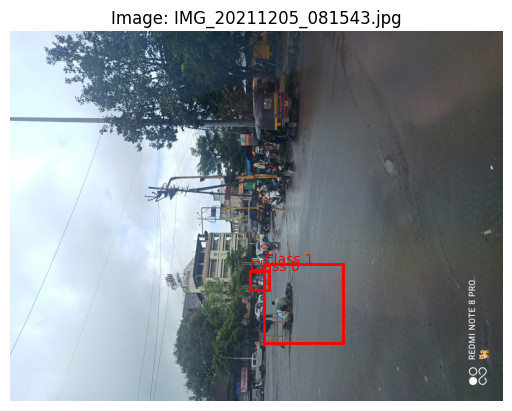

In [21]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches


#random.seed(40)
# Paths
train_images_dir = "/content/data/train/images"
train_labels_dir = "/content/data/train/labels"

# Get random image
images = [f for f in os.listdir(train_images_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
if not images:
    raise FileNotFoundError("No images found in train/images folder.")
img_name = random.choice(images)

# Paths for image and label
img_path = os.path.join(train_images_dir, img_name)
label_path = os.path.join(train_labels_dir, os.path.splitext(img_name)[0] + ".txt")

# Load image
img = Image.open('/content/data/train/images/1 (1).jpg')
w, h = img.size

# Plot
fig, ax = plt.subplots()
ax.imshow(img)

# Draw boxes if label exists
if os.path.exists(label_path):
    with open(label_path, "r") as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.split())
            x_center *= w
            y_center *= h
            width *= w
            height *= h

            x1 = x_center - width / 2
            y1 = y_center - height / 2

            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1 - 5, f"Class {int(class_id)}", color='red', fontsize=10)

plt.title(f"Image: {img_name}")
plt.axis("off")
plt.show()


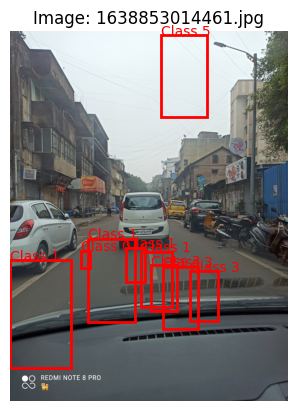

In [29]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, ExifTags
import matplotlib.patches as patches

train_images_dir = "/content/data/train/images"
train_labels_dir = "/content/data/train/labels"

# Pick random image
images = [f for f in os.listdir(train_images_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
if not images:
    raise FileNotFoundError("No images found in train/images folder.")
img_name = random.choice(images)

img_path = os.path.join(train_images_dir, img_name)
label_path = os.path.join(train_labels_dir, os.path.splitext(img_name)[0] + ".txt")

# Load image without auto rotation
img = Image.open(img_path)
try:
    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    exif = img._getexif()
    if exif is not None:
        orientation_value = exif.get(orientation, None)
        if orientation_value == 3:
            img = img.rotate(180, expand=True)
        elif orientation_value == 6:
            img = img.rotate(270, expand=True)
        elif orientation_value == 8:
            img = img.rotate(90, expand=True)
except Exception:
    pass

w, h = img.size

fig, ax = plt.subplots()
ax.imshow(img)

# Draw boxes
if os.path.exists(label_path):
    with open(label_path, "r") as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.split())
            x_center *= w
            y_center *= h
            width *= w
            height *= h

            x1 = x_center - width / 2
            y1 = y_center - height / 2

            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1 - 5, f"Class {int(class_id)}", color='red', fontsize=10)

plt.title(f"Image: {img_name}")
plt.axis("off")
plt.show()
